In [3]:
# importando as bibliotecas
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# matriz de confusão
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

In [4]:
# importacão da base de dados presente no google drive, e separação das colunas usando o parâmetro 'sep' para separar por vírgula.
dataset = pd.read_csv('combinacoes-final.csv')
dataset

,Perfil,Caracteristica,Critério/subcritério,Método que avalia
0,Aluno,Pedagógicas,Acompanhamento,Avaliação ergonômico-pedagógica
1,Especialista,Pedagógicas,Acompanhamento,Avaliação ergonômico-pedagógica
2,Professor,Pedagógicas,Acompanhamento,Avaliação ergonômico-pedagógica
3,Monitor,Pedagógicas,Acompanhamento,Avaliação ergonômico-pedagógica
4,Especialista,Pedagógicas,Acompanhamento,Checklist de Soad
...,...,...,...,...
1045,Professor,Técnicas,Manutenção,TICESE
1046,Professor,Técnicas,Portabilidade,TICESE
1047,Professor,Técnicas,Prevenção de erros,TICESE
1048,Professor,Técnicas,Prevenção de erros,TICESE


# Pré Processamento

In [5]:
# verificando a presença de atributos nulos na base de dados
dataset.isnull().sum()

Perfil                  0
Caracteristica          0
Critério/subcritério    0
Método que avalia       0
dtype: int64

In [6]:
# agrupando por método que avalia
group = dataset.groupby(['Método que avalia']).size()
group

Método que avalia
ASE                                 11
Avaliação ergonômico-pedagógica    156
Checklist de Porto                   2
Checklist de Soad                  123
FASE                                21
Heuristics Evaluation Strategy      15
IAQSEM                              49
LORI                                 5
MAEP                                34
MAQSE                               11
MAQSEI                              45
MEEGA+                             102
MoLEva                             129
Muchielli                            4
Método de Barbosa                  168
Método de Lúlia e Simões            11
PETESE                              45
Questionário de Silva e Batista     10
Reeves                              15
Rocha                               14
Rodrigues                           21
SAVI                                13
TICESE                              19
TUP Model                           27
dtype: int64

In [7]:
# Pré-processamento dos dados textuais
documentos = []
for _, row in dataset.iterrows():
    perfil = row['Perfil']
    caracteristica = row['Caracteristica']
    criterio = row['Critério/subcritério']
    classe_saida = row['Método que avalia']
    documentos.append(f"{perfil} {caracteristica} {criterio} {classe_saida}")

documentos

['Aluno Pedagógicas Acompanhamento Avaliação ergonômico-pedagógica',
 'Especialista Pedagógicas Acompanhamento Avaliação ergonômico-pedagógica',
 'Professor Pedagógicas Acompanhamento Avaliação ergonômico-pedagógica',
 'Monitor Pedagógicas Acompanhamento Avaliação ergonômico-pedagógica',
 'Especialista Pedagógicas Acompanhamento Checklist de Soad',
 'Especialista Pedagógicas Acompanhamento MoLEva',
 'Professor Pedagógicas Acompanhamento TUP Model',
 'Aluno Pedagógicas Adaptabilidade Avaliação ergonômico-pedagógica',
 'Especialista Pedagógicas Adaptabilidade Avaliação ergonômico-pedagógica',
 'Professor Pedagógicas Adaptabilidade Avaliação ergonômico-pedagógica',
 'Monitor Pedagógicas Adaptabilidade Avaliação ergonômico-pedagógica',
 'Especialista Pedagógicas Adaptabilidade Checklist de Soad',
 'Professor Pedagógicas Adaptabilidade MAQSEI',
 'Especialista Pedagógicas Adaptabilidade MoLEva',
 'Especialista Pedagógicas Adaptabilidade PETESE',
 'Aluno Pedagógicas Adaptação ao contexto Aval

TF-IDF: Calcula um peso para cada palavra em cada documento com base na frequência da palavra no documento e em todo o corpus. Isso ajuda a destacar palavras-chave que são mais discriminantes.

In [8]:
# Convertendo os documentos em uma representação vetorial usando TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documentos)

In [9]:
# Definindo a variável de saída
y = dataset['Método que avalia']
y

0       Avaliação ergonômico-pedagógica
1       Avaliação ergonômico-pedagógica
2       Avaliação ergonômico-pedagógica
3       Avaliação ergonômico-pedagógica
4                     Checklist de Soad
                     ...               
1045                             TICESE
1046                             TICESE
1047                             TICESE
1048                             TICESE
1049                             TICESE
Name: Método que avalia, Length: 1050, dtype: object

In [10]:
# Codifique as classes de saída
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [11]:
# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# Modelo KNN

In [12]:
# Criando e treinando o modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
# Fazendo as previsões no conjunto de teste
y_pred_knn = knn.predict(X_test)

In [14]:
# realtório de desempenho do modelo KNN
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.61      1.00      0.76        47
           2       0.00      0.00      0.00         1
           3       0.47      0.59      0.52        37
           4       0.40      0.67      0.50         6
           5       1.00      1.00      1.00         5
           6       0.48      0.67      0.56        15
           7       1.00      1.00      1.00         1
           8       0.50      0.60      0.55        10
           9       0.67      0.67      0.67         3
          10       0.57      0.31      0.40        13
          11       0.88      0.68      0.76        31
          12       0.48      0.33      0.39        39
          13       0.00      0.00      0.00         1
          14       0.75      0.92      0.83        50
          15       1.00      0.67      0.80         3
          16       1.00      0.07      0.13        14
          17       1.00    

/Users/lacienemelo/Documents/developed-software/python-dev/virtual-environment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lacienemelo/Documents/developed-software/python-dev/virtual-environment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lacienemelo/Documents/developed-software/python-dev/virtual-environment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in label

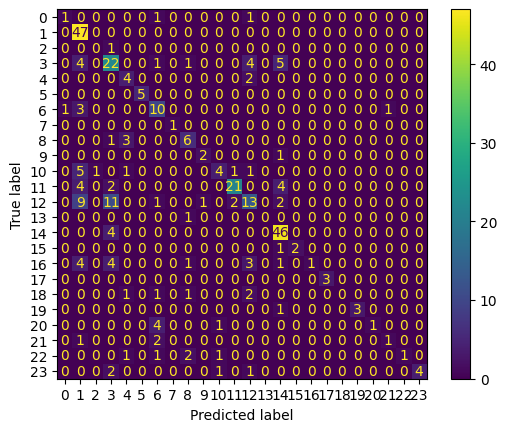

In [15]:
# Crie a matriz de confusão
confMatrixKNN = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_knn))
confMatrixKNN.plot()


# Modelo Random Forest

In [16]:
# importando bibliotecas
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [17]:
# criando modelo random forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# fazendo a previsão dos conjuntos de teste
y_pred_RF = random_forest.predict(X_test)

In [19]:
# relatório de desempenho do modelo Random Forest
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00        13
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        39
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00        50
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00        14
          17       1.00    

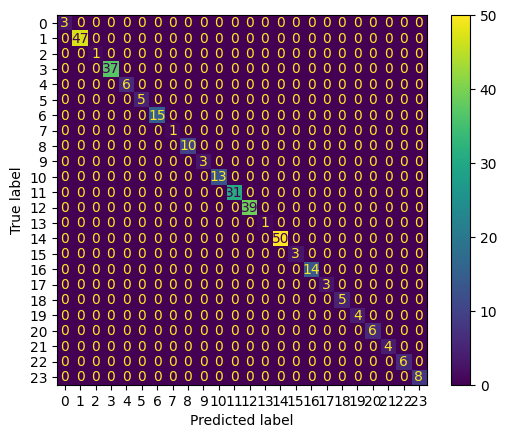

In [20]:
# Crie a matriz de confusão
confMatrixRF = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_RF))
confMatrixRF.plot()

# Modelo RNA

In [21]:
# importando bibliotecas
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [22]:
# Crie a arquitetura da RNA
model = Sequential()
model.add(Dense(3, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

In [23]:
# Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
# treina o modelo
model.fit(X_train.toarray(), y_train, epochs=100, batch_size=32)

Epoch 1/100
23/23 [==============================] - 0s 712us/step - loss: 3.1576 - accuracy: 0.1442
Epoch 2/100
23/23 [==============================] - 0s 593us/step - loss: 3.0894 - accuracy: 0.1605
Epoch 3/100
23/23 [==============================] - 0s 498us/step - loss: 2.9573 - accuracy: 0.1605
Epoch 4/100
23/23 [==============================] - 0s 465us/step - loss: 2.7557 - accuracy: 0.1605
Epoch 5/100
23/23 [==============================] - 0s 466us/step - loss: 2.5752 - accuracy: 0.1605
Epoch 6/100
23/23 [==============================] - 0s 466us/step - loss: 2.4712 - accuracy: 0.1959
Epoch 7/100
23/23 [==============================] - 0s 457us/step - loss: 2.3881 - accuracy: 0.2667
Epoch 8/100
23/23 [==============================] - 0s 452us/step - loss: 2.2980 - accuracy: 0.2966
Epoch 9/100
23/23 [==============================] - 0s 447us/step - loss: 2.1926 - accuracy: 0.3075
Epoch 10/100
23/23 [==============================] - 0s 456us/step - loss: 2.0785 - accura

In [25]:
# Faça previsões no conjunto de teste
y_pred = model.predict(X_test.toarray())
y_pred = label_encoder.inverse_transform(y_pred.argmax(axis=1))

10/10 [==============================] - 0s 435us/step


In [26]:
# relatório de desempenho do modelo RNA
print(classification_report(label_encoder.inverse_transform(y_test), y_pred))

                                 precision    recall  f1-score   support

                            ASE       1.00      1.00      1.00         3
Avaliação ergonômico-pedagógica       0.98      1.00      0.99        47
             Checklist de Porto       0.00      0.00      0.00         1
              Checklist de Soad       1.00      1.00      1.00        37
                           FASE       0.86      1.00      0.92         6
 Heuristics Evaluation Strategy       1.00      1.00      1.00         5
                         IAQSEM       1.00      1.00      1.00        15
                           LORI       0.00      0.00      0.00         1
                           MAEP       1.00      1.00      1.00        10
                          MAQSE       1.00      1.00      1.00         3
                         MAQSEI       1.00      1.00      1.00        13
                         MEEGA+       1.00      1.00      1.00        31
                         MoLEva       1.00      1.

/Users/lacienemelo/Documents/developed-software/python-dev/virtual-environment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lacienemelo/Documents/developed-software/python-dev/virtual-environment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lacienemelo/Documents/developed-software/python-dev/virtual-environment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in label